In [809]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.metrics import explained_variance_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.graphics.gofplots import qqplot

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [398]:
df = pd.read_csv('../Data/hour.csv')

df = df.drop('instant', axis=1)

In [399]:
df.dteday = pd.to_datetime(df.dteday)

In [344]:
min(df.dteday)

Timestamp('2011-01-01 00:00:00')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 2.1 MB


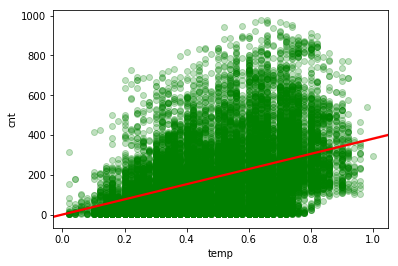

In [379]:
sns.regplot(x="temp", y="cnt", data=df, line_kws={'color':'r'}, scatter_kws={'color':'g', 'alpha':0.25});
plt.show()

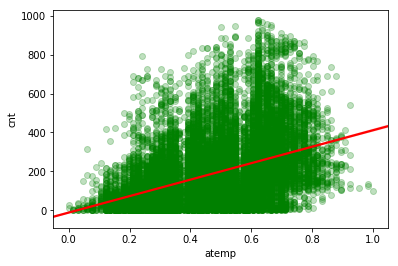

In [380]:
sns.regplot(x="atemp", y="cnt", data=df, line_kws={'color':'r'}, scatter_kws={'color':'g', 'alpha':0.25});
plt.show()

In [400]:
for season in df.season.unique():
    df['season_'+str(season)] = (df['season']==season)
    
df = df.drop('season', axis=1)

In [676]:
sns.barplot(x="mnth", y="cnt", hue='yr', data=df)
plt.show()

ValueError: Could not interpret input 'cnt'

In [677]:
for mnth in df.mnth.unique():
    df['mnth_'+str(mnth)] = (df['mnth']==mnth)
    
df = df.drop('mnth', axis=1)

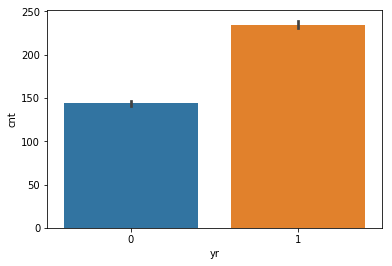

In [384]:
sns.barplot(x="yr", y="cnt", data=df)
plt.show()

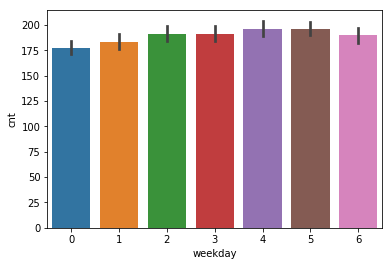

In [352]:
sns.barplot(x="weekday", y="cnt", data=df)
plt.show()

In [401]:
for weekday in df.weekday.unique():
    df['weekday_'+str(weekday)] = (df['weekday']== weekday)
    
df = df.drop('weekday', axis = 1)

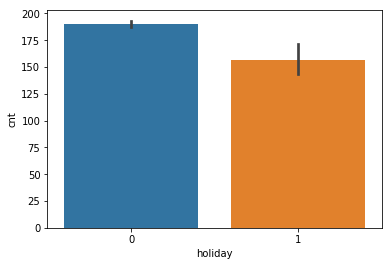

In [386]:
sns.barplot(x="holiday", y="cnt", data=df)
plt.show()

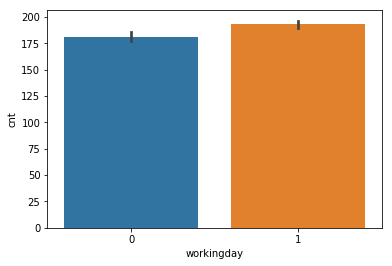

In [387]:
sns.barplot(x="workingday", y="cnt", data=df)
plt.show()

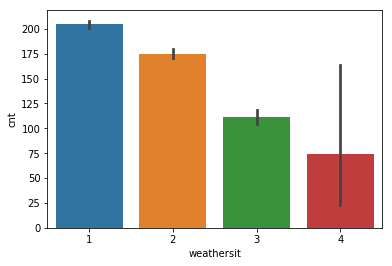

In [388]:
sns.barplot(x="weathersit", y="cnt", data=df)
plt.show()

In [402]:
for weathersit in df.weathersit.unique():
    df['weathersit_'+str(weathersit)] = (df['weathersit']== weathersit)
    
df = df.drop('weathersit', axis=1)

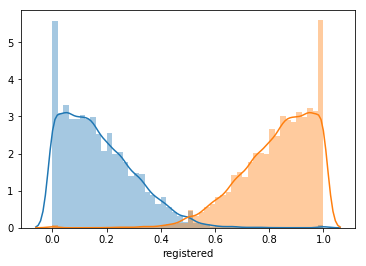

In [403]:
x = df['casual']/df['cnt'].values
y = df['registered']/df['cnt'].values
sns.distplot(x);
sns.distplot(y);
plt.show()

In [404]:
df['outcome'] = df['cnt']
df['casual_users'] = df['casual']
df['registered_users'] = df['registered']
df = df.drop(['cnt', 'casual', 'registered'], axis = 1)

In [98]:
scaler = StandardScaler()
scaler.fit(df.iloc[:, 1:-3])
X = scaler.transform(df.iloc[:, 1:-3])

In [596]:
lr = LinearRegression(fit_intercept=False)
grid =GridSearchCV(lr, {}, cv=32 )
grid.fit(df.iloc[:, 1:-3], np.log(df['outcome']))
y_pred = grid.predict(df.iloc[:, 1:-3])

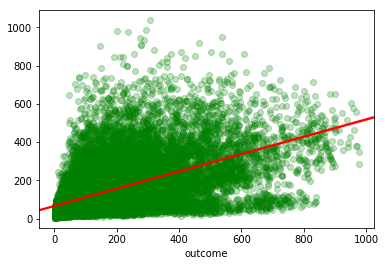

In [527]:
sns.regplot(x=df['outcome'], y=np.exp(y_pred), line_kws={'color':'r'}, scatter_kws={'color':'g', 'alpha':0.25});
plt.show()

In [526]:
grid.score(df.iloc[:, 1:-3], np.log(df.outcome))
explained_variance_score(np.log(df.outcome), y_pred)
mean_squared_error(df.outcome, np.exp(y_pred))

26168.818663916772

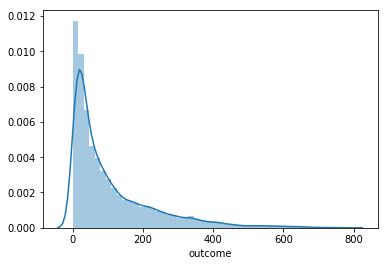

In [432]:
sns.distplot(np.absolute(df.outcome - np.exp(y_pred)))
plt.show()

In [418]:
np.percentile(np.absolute(df.outcome - np.exp(y_pred)), 49)


57.067035308078516

In [145]:
df[df['dteday'] == '2011-01-01'].head()

,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,season_1,...,weekday_3,weekday_4,weekday_5,weathersit_1,weathersit_2,weathersit_3,weathersit_4,outcome,casual_users,registered_users
0,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,True,...,False,False,False,True,False,False,False,16,3,13
1,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0,True,...,False,False,False,True,False,False,False,40,8,32
2,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0,True,...,False,False,False,True,False,False,False,32,5,27
3,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0,True,...,False,False,False,True,False,False,False,13,3,10
4,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0,True,...,False,False,False,True,False,False,False,1,0,1


In [149]:
df = df.drop(df[(df['dteday'] == '2012-06-01') & (df['dteday'] == '2012-08-29') & (df['dteday'] == '2012-08-30') & (df['dteday'] == '2012-06-29')].index)

In [154]:
lr.coef_

array([ 0.40226758,  0.09865476,  0.45714032,  0.63930118,  1.96786651,
        1.21704959, -1.42010562,  0.27691715,  0.42977121,  0.79253467,
        0.72577183,  1.0169211 ,  0.53948302,  0.53201482,  0.38838997,
        0.17060429,  0.24503436, -0.05980981, -0.19996462, -0.01228869,
        0.26153545,  0.3038131 ,  0.3482329 ,  0.44795402,  0.97078576,
        0.89777155,  0.20205359,  0.16429938,  0.19112251,  0.20495825,
        0.33400777,  0.59230987,  0.75552581,  0.3436623 ,  1.27350083])

In [372]:
clf=Ridge()
clf.fit(df.iloc[:, 1:-3], np.log(df['outcome']))
y_pred = clf.predict(df.iloc[:, 1:-3])

In [373]:
clf.score(df.iloc[:, 1:-3], np.log(df['outcome']))

0.48358841752633153

In [374]:
regr = ElasticNet(random_state=0)
regr.fit(df.iloc[:, 1:-3], np.log(df['outcome']))
y_pred = regr.predict(df.iloc[:, 1:-3])

In [375]:
regr.score(df.iloc[:, 1:-3], np.log(df['outcome']))

0.32515156756872921

In [675]:
np.absolute(df.corr()).outcome.sort_values(ascending=False)

outcome             1.000000
registered_users    0.972151
casual_users        0.694564
temp                0.404772
atemp               0.400929
hr                  0.394071
hum                 0.322911
yr                  0.250495
season_1            0.245456
season_3            0.151621
weathersit_3        0.128034
mnth                0.120638
weathersit_1        0.117478
windspeed           0.093234
season_2            0.060692
weathersit_2        0.046902
holiday             0.030927
workingday          0.030284
season_4            0.029421
weekday_0           0.027118
weekday_4           0.015653
weekday_5           0.015034
weekday_1           0.012860
weathersit_4        0.008340
weekday_2           0.003969
weekday_3           0.003746
weekday_6           0.001692
Name: outcome, dtype: float64

In [768]:
m = ols('np.log(outcome) ~ temp + hr + hum + yr + weekday_0  +  weathersit_3 +  season_1  + season_4 + mnth_1 + mnth_2 + mnth_3  +  mnth_6 + mnth_7 + mnth_8  + mnth_12 - 1',df[ol['unadj_p']>0.2]).fit()

#ols.score(df.loc[:,['temp','hr','hum','yr','weekday_0','weathersit_3','season_1','season_3','season_4','mnth_1','mnth_2','mnth_3','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_12']])
print(m.summary())
#ol = m.outlier_test()

                            OLS Regression Results                            
Dep. Variable:        np.log(outcome)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2005.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        14:12:43   Log-Likelihood:                -13847.
No. Observations:               14001   AIC:                         2.773e+04
Df Residuals:                   13985   BIC:                         2.785e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
weekday_0[False]         2.9465 

In [744]:

fig = influence_plot(m)
fig.set_size_inches(16, 10, forward=True)
plt.show()

KeyboardInterrupt: 

In [737]:
#list((x[i],y[i]) for i,t in enumerate(ol) if t[2] < 0.5)
#df[ol['unadj_p']>0.5]

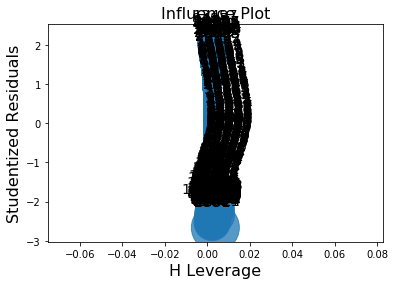

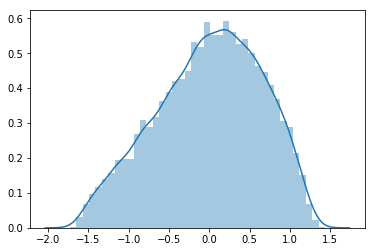

In [748]:
sns.distplot(m.resid)
plt.show()

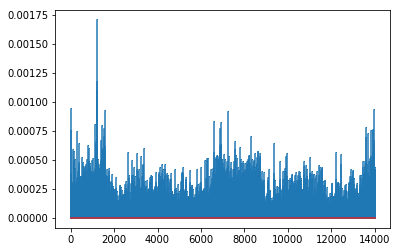

In [778]:
(c,p) = m.get_influence().cooks_distance

plt.stem(np.arange(len(c)), c, markerfmt=",")

plt.show()

In [805]:
df.iloc[1]

dteday              2011-01-01 00:00:00
yr                                    0
hr                                    1
holiday                               0
workingday                            0
temp                               0.22
atemp                            0.2727
hum                                 0.8
windspeed                             0
season_1                           True
season_2                          False
season_3                          False
season_4                          False
weekday_6                          True
weekday_0                         False
weekday_1                         False
weekday_2                         False
weekday_3                         False
weekday_4                         False
weekday_5                         False
weathersit_1                       True
weathersit_2                      False
weathersit_3                      False
weathersit_4                      False
outcome                              40


In [807]:
c = np.array(c)

df1 = df[ol['unadj_p']>0.2]
df2 = df1[c<0.00075]
#df2.info()
m = ols('np.log(outcome) ~ temp + hr + hum + yr + weekday_0 + weathersit_3 +  season_1 + season_4 + mnth_1 + mnth_2 + mnth_3   +  mnth_6 + mnth_7 + mnth_8  + mnth_12 - 1',df2).fit()

#ols.score(df.loc[:,['temp','hr','hum','yr','weekday_0','weathersit_3','season_1','season_3','season_4','mnth_1','mnth_2','mnth_3','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_12']])
print(m.summary())
#ol = m.outlier_test()

                            OLS Regression Results                            
Dep. Variable:        np.log(outcome)   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2001.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        15:13:44   Log-Likelihood:                -13790.
No. Observations:               13984   AIC:                         2.761e+04
Df Residuals:                   13968   BIC:                         2.773e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
weekday_0[False]         2.9569 

NameError: name 'qqpolt' is not defined

In [776]:
len(c)

1

In [211]:
df.loc[:,['atemp' , 'hr', 'hum', 'windspeed']].head()

,atemp,hr,hum,windspeed
0,0.2879,0,0.81,0.0
1,0.2727,1,0.80,0.0
2,0.2727,2,0.80,0.0
3,0.2879,3,0.75,0.0
4,0.2879,4,0.75,0.0


In [212]:
lr = LinearRegression()
grid =GridSearchCV(lr, {}, cv=10 )
grid.fit(df.loc[:,['atemp' , 'hr', 'hum', 'windspeed']], np.log(df['outcome']))
y_pred = grid.predict(df.loc[:,['atemp' , 'hr', 'hum', 'windspeed']])
grid.score(df.loc[:,['atemp' , 'hr', 'hum', 'windspeed']], np.log(df['outcome']))

0.44677190194144129

In [291]:
clf = RandomForestClassifier(n_estimators=20)
sfm = SelectFromModel(clf)
sfm.fit(df.iloc[:, 1:-3].astype(float), df['outcome'].astype(int))

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [292]:
x = [False]

x.extend(sfm.get_support())

x.extend([False, False, False])

df.loc[:, x].head()

,hr,temp,atemp,hum,windspeed
0,0,0.24,0.2879,0.81,0.0
1,1,0.22,0.2727,0.80,0.0
2,2,0.22,0.2727,0.80,0.0
3,3,0.24,0.2879,0.75,0.0
8,8,0.24,0.2879,0.75,0.0


In [293]:
clf = RandomForestClassifier(n_estimators=8)
clf1 = Lasso()
rfe = RFE(estimator=clf1)
rfe.fit(df.iloc[:, 1:-3].astype(float), df['outcome'].astype(int))
rfe.ranking_

array([ 1,  1,  6,  5,  1,  2,  1,  1,  1,  9,  1,  1, 16, 17, 15, 10,  1,
       19,  1,  1,  1,  1,  7,  1,  1, 12,  8, 13, 14, 11,  3,  4,  1,  1,
       18])

In [294]:
x = [False]

x.extend(rfe.get_support())

x.extend([False, False, False])

df.loc[:, x].columns

Index(['yr', 'hr', 'temp', 'hum', 'windspeed', 'season_1', 'season_3',
       'season_4', 'mnth_5', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_12', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [249]:
y = np.log(df['outcome'])

y[y<2].count()

1515

In [250]:
df[df['outcome'] < 8].loc[]

,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,season_1,...,weekday_3,weekday_4,weekday_5,weathersit_1,weathersit_2,weathersit_3,weathersit_4,outcome,casual_users,registered_users
4,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,True,...,False,False,False,True,False,False,False,1,0,1
5,2011-01-01,0,5,0,0,0.24,0.2576,0.75,0.0896,True,...,False,False,False,False,True,False,False,1,0,1
6,2011-01-01,0,6,0,0,0.22,0.2727,0.80,0.0000,True,...,False,False,False,True,False,False,False,2,2,0
7,2011-01-01,0,7,0,0,0.20,0.2576,0.86,0.0000,True,...,False,False,False,True,False,False,False,3,1,2
27,2011-01-02,0,3,0,0,0.46,0.4545,0.94,0.1940,True,...,False,False,False,False,True,False,False,6,2,4
28,2011-01-02,0,4,0,0,0.46,0.4545,0.94,0.1940,True,...,False,False,False,False,True,False,False,3,2,1
29,2011-01-02,0,6,0,0,0.42,0.4242,0.77,0.2985,True,...,False,False,False,False,False,True,False,2,0,2
30,2011-01-02,0,7,0,0,0.40,0.4091,0.76,0.1940,True,...,False,False,False,False,True,False,False,1,0,1
47,2011-01-03,0,0,0,1,0.22,0.1970,0.44,0.3582,True,...,False,False,False,True,False,False,False,5,0,5
48,2011-01-03,0,1,0,1,0.20,0.1667,0.44,0.4179,True,...,False,False,False,True,False,False,False,2,0,2


In [279]:
df[df['outcome']<=3].outcome.count()

590

In [280]:
np.percentile(df.outcome, 97.5)

663.54999999999927

In [285]:
df = df.drop(df[(df['outcome']>=663) | (df['outcome']<=3)].index, axis = 0 )

In [298]:
df.windspeed.count()

16352

In [310]:
inertias = []

for i in range(2,12):
    cls = KMeans(n_clusters=i)
    cls.fit(df.iloc[:, 1:])
    inertias.append(cls.inertia_)
    
inertias

[233377122.07040265,
 121658602.98702554,
 81604709.59697175,
 63556872.730166145,
 49742683.662247963,
 40232968.725529425,
 34231985.370776683,
 29243069.936077796,
 26052451.820669577,
 23674083.896067828]

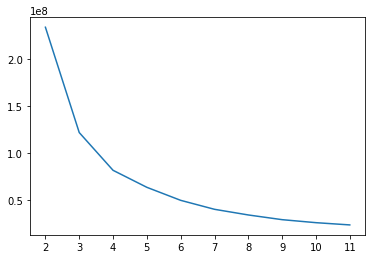

In [312]:
plt.plot(range(2,12), inertias)
plt.xticks(range(2,12))
plt.show()

In [315]:
cls = KMeans(n_clusters=4)
cls.fit(df.iloc[:, 1:])
cls.predict(df.iloc[:, 1:])
cls.cluster_centers_

array([[  4.19077758e-01,   7.99683544e+00,   3.81253767e-02,
          6.28089210e-01,   4.18487040e-01,   4.06064301e-01,
          7.00280289e-01,   1.74674593e-01,   3.42827004e-01,
          2.33574442e-01,   2.00271248e-01,   2.23327306e-01,
          1.27637131e-01,   1.03526221e-01,   9.76491863e-02,
          8.55937312e-02,   7.06751055e-02,   6.19349005e-02,
          6.41952984e-02,   6.44966847e-02,   7.02230259e-02,
          7.41410488e-02,   8.01687764e-02,   9.97588909e-02,
          1.63050030e-01,   1.70735383e-01,   1.41350211e-01,
          1.32007233e-01,   1.35774563e-01,   1.27486438e-01,
          1.29596142e-01,   6.05635925e-01,   2.70042194e-01,
          1.24020494e-01,   3.01386377e-04,   4.06348704e+01,
          6.18354430e+00,   3.44513261e+01],
       [  5.99293059e-01,   1.44383033e+01,   2.95629820e-02,
          6.54241645e-01,   5.91793059e-01,   5.59788175e-01,
          5.56519923e-01,   1.96392095e-01,   1.10218509e-01,
          2.91773779e-01,

In [392]:
def distance_from_clusters(df, centroids, labels):
    values = []
    for index, row in df.iterrows():
        value = 0
        for i in range(len(centroids[labels[index]])):
            value += (centroids[labels[index]][i] - row[i])**2
        values.append(np.sqrt(value))
    return values
        
distances = distance_from_clusters(df.iloc[:, 1:], cls.cluster_centers_, cls.predict(df.iloc[:, 1:]))

In [376]:
df = df.drop(df[distances>np.percentile(distances, 75)].index, axis = 0)

ValueError: Item wrong length 17379 instead of 15641.

In [394]:
df[distances>np.percentile(distances, 90)].weathersit

,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,season_1,...,weekday_3,weekday_4,weekday_5,weathersit_1,weathersit_2,weathersit_3,weathersit_4,outcome,casual_users,registered_users
1633,2011-03-13,0,14,0,0,0.46,0.4545,0.41,0.2985,True,...,False,False,False,True,False,False,False,250,144,106
1634,2011-03-13,0,15,0,0,0.48,0.4697,0.39,0.3284,True,...,False,False,False,True,False,False,False,304,149,155
1635,2011-03-13,0,16,0,0,0.46,0.4545,0.41,0.3881,True,...,False,False,False,True,False,False,False,256,124,132
1771,2011-03-19,0,12,0,0,0.46,0.4545,0.33,0.4179,True,...,False,False,False,True,False,False,False,267,126,141
1772,2011-03-19,0,13,0,0,0.50,0.4848,0.34,0.4627,True,...,False,False,False,True,False,False,False,301,174,127
1773,2011-03-19,0,14,0,0,0.50,0.4848,0.31,0.4925,True,...,False,False,False,True,False,False,False,312,168,144
1774,2011-03-19,0,15,0,0,0.50,0.4848,0.29,0.4179,True,...,False,False,False,True,False,False,False,313,170,143
1775,2011-03-19,0,16,0,0,0.50,0.4848,0.31,0.3881,True,...,False,False,False,True,False,False,False,304,175,129
1776,2011-03-19,0,17,0,0,0.48,0.4697,0.31,0.3284,True,...,False,False,False,True,False,False,False,278,138,140
1797,2011-03-20,0,14,0,0,0.40,0.4091,0.30,0.0000,True,...,False,False,False,True,False,False,False,279,145,134


In [520]:
sgd = SGDRegressor(random_state=42)
param_grid = {
    'loss':['squared_loss','huber','epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'fit_intercept' : [True, False],
    'learning_rate' : ['constant', 'optimal', 'invscaling']
}
grid =GridSearchCV(sgd, param_grid, cv=10 )
grid.fit(df.iloc[:, 1:-3], np.log(df['outcome']))
y_pred = grid.predict(df.iloc[:, 1:-3])

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

In [521]:
grid.score(df.iloc[:, 1:-3], np.log(df.outcome))
#explained_variance_score(np.log(df.outcome), y_pred)
#mean_squared_error(df.outcome, np.exp(y_pred))

0.46373937415698308

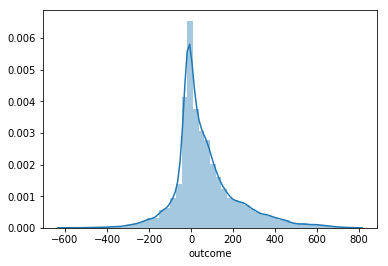

766.7671051935979

In [495]:
sns.distplot((df.outcome - np.exp(y_pred)))
plt.show()
np.max(np.absolute(df.outcome - np.exp(y_pred)))

In [491]:
x = np.absolute(df.outcome - np.exp(y_pred))

x[x>50].count()

9559

In [493]:
df[x>50]

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_3,weekday_4,weekday_5,weathersit_1,weathersit_2,weathersit_3,weathersit_4,outcome,casual_users,registered_users
20,2011-01-01,0,1,20,0,0,0.40,0.4091,0.87,0.2537,...,False,False,False,False,True,False,False,36,11,25
21,2011-01-01,0,1,21,0,0,0.40,0.4091,0.87,0.1940,...,False,False,False,False,True,False,False,34,3,31
22,2011-01-01,0,1,22,0,0,0.40,0.4091,0.94,0.2239,...,False,False,False,False,True,False,False,28,11,17
23,2011-01-01,0,1,23,0,0,0.46,0.4545,0.88,0.2985,...,False,False,False,False,True,False,False,39,15,24
42,2011-01-02,0,1,19,0,0,0.32,0.2879,0.42,0.4478,...,False,False,False,True,False,False,False,30,1,29
43,2011-01-02,0,1,20,0,0,0.30,0.2727,0.39,0.3582,...,False,False,False,True,False,False,False,22,5,17
44,2011-01-02,0,1,21,0,0,0.26,0.2273,0.44,0.3284,...,False,False,False,True,False,False,False,31,11,20
45,2011-01-02,0,1,22,0,0,0.24,0.2121,0.44,0.2985,...,False,False,False,True,False,False,False,9,0,9
46,2011-01-02,0,1,23,0,0,0.22,0.2273,0.47,0.1642,...,False,False,False,True,False,False,False,8,0,8
53,2011-01-03,0,1,8,0,1,0.14,0.1212,0.50,0.2836,...,False,False,False,True,False,False,False,154,1,153


In [ ]:
df[df['dteday']=='2011-02-28']

In [619]:
iso = IsolationForest(contamination=0.5)
iso.fit(df.iloc[:, 1:-3], np.log(df['outcome']))
y_iso = iso.predict(df.iloc[:, 1:-3])

In [554]:
sum(y_iso[y_iso==-1])

-8690

In [536]:
df[y_iso==1].head()

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_3,weekday_4,weekday_5,weathersit_1,weathersit_2,weathersit_3,weathersit_4,outcome,casual_users,registered_users
0,2011-01-01,0,1,0,0,0,0.24,0.2879,0.81,0.0,...,False,False,False,True,False,False,False,16,3,13
1,2011-01-01,0,1,1,0,0,0.22,0.2727,0.80,0.0,...,False,False,False,True,False,False,False,40,8,32
2,2011-01-01,0,1,2,0,0,0.22,0.2727,0.80,0.0,...,False,False,False,True,False,False,False,32,5,27
3,2011-01-01,0,1,3,0,0,0.24,0.2879,0.75,0.0,...,False,False,False,True,False,False,False,13,3,10
4,2011-01-01,0,1,4,0,0,0.24,0.2879,0.75,0.0,...,False,False,False,True,False,False,False,1,0,1


In [666]:
lr = LinearRegression()
grid =GridSearchCV(lr, {}, cv=32 )
grid.fit(df.iloc[:, 1:-3], ((df['outcome'] - np.mean(df['outcome']))/np.std(df['outcome'])))
y_pred = grid.predict(df.iloc[:, 1:-3])

In [667]:
grid.score(df.iloc[:, 1:-3], ((df['outcome'] - np.mean(df['outcome']))/np.std(df['outcome'])))
#explained_variance_score(np.log(df.outcome), y_pred)
#mean_squared_error(df[y_iso==1].outcome, np.exp(y_pred))

0.39880880399665208

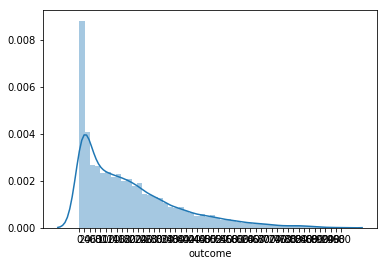

In [543]:
sns.distplot(df.outcome, bins=50)
plt.xticks(np.arange(0,1000,20))
plt.show()

In [541]:
df[df['outcome']==0]

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_3,weekday_4,weekday_5,weathersit_1,weathersit_2,weathersit_3,weathersit_4,outcome,casual_users,registered_users


In [618]:
ele = EllipticEnvelope(contamination=0.2)
ele.fit(df.iloc[:, 1:-3], df['outcome'])
y_iso = ele.predict(df.iloc[:, 1:-3])

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [577]:
sum(y_iso[y_iso==1])

15641

In [584]:
lof = LocalOutlierFactor()
y_iso = lof.fit_predict(df.iloc[:, 1:-3], np.log(df['outcome']))

In [626]:
fig = plt.gcf()
fig.set_size_inches(16, 10, forward=True)
sns.regplot(df['outcome'], np.absolute(df.outcome-np.exp(y_pred))/df.outcome)
plt.show()

ValueError: operands could not be broadcast together with shapes (17379,) (13625,) 

In [627]:
y_iso = df['outcome']>30

In [628]:
y_iso

0        False
1         True
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22       False
23        True
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
17349     True
17350     True
17351     True
17352     True
17353     True
17354     True
17355     True
17356    False
17357    False
17358    False
17359    False
17360    False
17361     True
17362     True
17363     True
17364     True
17365     True
17366     True
17367     True
17368     True
17369     True
17370     True
17371     True
17372     True
17373     True
17374     True
17375     True
17376     True
17377     True
17378     True
Name: outcome, Length: 17379, dtype: bool

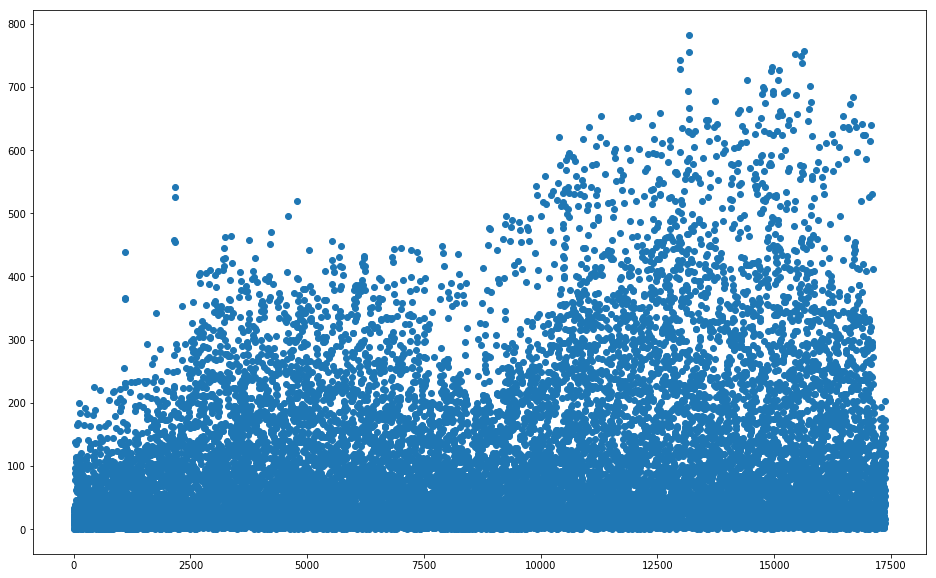

In [638]:
fig = plt.gcf()
fig.set_size_inches(16, 10, forward=True)
plt.scatter(np.arange(len(y_pred)), np.absolute(np.exp(y_pred)-df.outcome))
plt.show()

In [643]:
np.absolute(df[(np.absolute(np.exp(y_pred)-df.outcome)>100)].corr()).outcome.sort_values(ascending=False)

outcome             1.000000
registered_users    0.947422
casual_users        0.517799
temp                0.272715
atemp               0.268314
yr                  0.264005
hr                  0.249492
season_1            0.201599
hum                 0.167102
season_3            0.119127
weathersit_1        0.111365
weathersit_3        0.093028
mnth                0.085309
weathersit_2        0.068580
workingday          0.063771
weekday_0           0.061870
holiday             0.046710
weekday_3           0.043247
windspeed           0.042444
season_2            0.037550
weekday_2           0.034351
weekday_5           0.026192
weekday_4           0.022774
weekday_1           0.007185
season_4            0.004117
weekday_6           0.000076
weathersit_4             NaN
Name: outcome, dtype: float64

In [644]:
np.absolute(df[(np.absolute(np.exp(y_pred)-df.outcome)<100)].corr()).outcome.sort_values(ascending=False)

outcome             1.000000
registered_users    0.980360
casual_users        0.827808
hr                  0.611865
temp                0.449511
atemp               0.440705
hum                 0.433614
season_1            0.217545
yr                  0.167849
windspeed           0.145062
season_3            0.143225
weathersit_3        0.137779
weathersit_1        0.109572
mnth                0.107182
workingday          0.066973
season_2            0.056370
weekday_5           0.052148
weekday_0           0.040809
season_4            0.033582
weekday_6           0.032877
holiday             0.032394
weekday_4           0.031710
weathersit_2        0.027650
weekday_1           0.015052
weekday_3           0.006561
weathersit_4        0.005225
weekday_2           0.002777
Name: outcome, dtype: float64

In [663]:
(df[(np.absolute(np.exp(y_pred)-df.outcome)>100)].groupby('dteday').dteday.count()).values

array([ 1,  3,  1,  3,  2,  2,  4,  2,  2,  1,  2,  2,  4,  1,  3,  4,  2,
        3,  4,  1,  2,  4,  3,  3,  3,  3,  2,  2,  1,  1,  2,  5,  5,  2,
        2,  4,  8,  4,  6,  1,  3,  3,  1,  1,  6,  2,  3,  5,  4,  3,  5,
        5,  5,  5, 11,  4,  2,  7,  5,  5,  5,  6,  7,  9,  8,  3,  8,  4,
        3,  6,  8,  3,  5,  6,  2,  4,  5,  4, 10, 11,  5,  7,  5,  3,  7,
        9,  9,  4,  3,  6,  8,  2, 11,  7,  6,  9,  7,  3, 11,  8,  8,  7,
        7,  9,  7, 10,  6,  8,  8,  4,  7,  7, 11,  8,  7,  8,  5,  8,  9,
       11,  9,  8,  9,  8, 11,  8,  9, 10,  8,  7,  8,  8,  7, 10,  9,  8,
       10,  9, 11, 10, 12, 12, 10,  8, 10, 14,  9,  6,  7,  8,  6,  8,  8,
        7, 10,  9,  8, 12,  9,  9,  8, 11, 13,  6,  7,  8,  8,  8,  9, 10,
       14,  7,  8,  8,  8, 10,  7,  8,  9,  7,  6,  8, 12,  8,  7,  8, 10,
       11, 14, 11,  9,  7,  9,  8, 10, 16,  9,  8, 11,  9,  7,  7,  8, 11,
        7,  8,  9,  8,  8,  7,  9, 11,  9,  8,  7,  6,  6, 11, 11,  8, 11,
        9,  5,  8,  2, 12